In [1]:
import numpy as np 

In [2]:
#define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1-x)


In [3]:
#define the xor dataset
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
output = np.array([[0],[1],[1],[0]])

In [5]:
#set random seed for reproducibility
np.random.seed(100)

# initializ weights randomly with mean 0
input_size = 2
hidden_size = 4
output_size = 1

weights_input_hidden = np.random.uniform(-1,1,(input_size,hidden_size))
weights_hidden_output = np.random.uniform(-1,1,(hidden_size,output_size))


In [6]:
#hyperparameters
learning_rate=0.1
epochs=20

In [8]:
#training loop 
for epoch in range(epochs):
    #forward propagation
    hidden_layer_input = np.dot(inputs,weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output,weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    #calculate error
    error = output - predicted_output

    #backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    #update weights

    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output)*learning_rate
    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate

    #test the trained network
    test_input = np.array([[0,0],[0,1],[1,0],[1,1]])
    test_output = sigmoid(np.dot(sigmoid(np.dot(test_input,weights_input_hidden)),weights_hidden_output))
    print("Predicted XOR outputs:-")
    print(test_output)



Predicted XOR outputs:-
[[0.45441108]
 [0.4828465 ]
 [0.41576751]
 [0.44976347]]
Predicted XOR outputs:-
[[0.45557475]
 [0.48406395]
 [0.41709279]
 [0.45111901]]
Predicted XOR outputs:-
[[0.45670988]
 [0.48525095]
 [0.4183874 ]
 [0.45244228]]
Predicted XOR outputs:-
[[0.45781707]
 [0.48640816]
 [0.41965197]
 [0.45373395]]
Predicted XOR outputs:-
[[0.45889692]
 [0.48753625]
 [0.42088712]
 [0.45499471]]
Predicted XOR outputs:-
[[0.45995003]
 [0.48863588]
 [0.42209346]
 [0.45622523]]
Predicted XOR outputs:-
[[0.46097698]
 [0.48970769]
 [0.42327161]
 [0.45742616]]
Predicted XOR outputs:-
[[0.46197836]
 [0.49075231]
 [0.42442217]
 [0.45859816]]
Predicted XOR outputs:-
[[0.46295473]
 [0.49177038]
 [0.42554573]
 [0.45974188]]
Predicted XOR outputs:-
[[0.46390665]
 [0.4927625 ]
 [0.42664288]
 [0.46085795]]
Predicted XOR outputs:-
[[0.46483468]
 [0.49372928]
 [0.42771419]
 [0.46194699]]
Predicted XOR outputs:-
[[0.46573936]
 [0.49467131]
 [0.42876024]
 [0.46300961]]
Predicted XOR outputs:-
[[0.

Open AI Gym 

In [3]:
import gym
env = gym.make("CartPole-v1")
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()


/home/nimish-grover/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


PCA

In [3]:
import numpy as np 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [7]:
#create a sample dataset
np.random.seed(0)
n_samples = 100
n_features = 2
x = np.random.randn(n_samples,n_features)


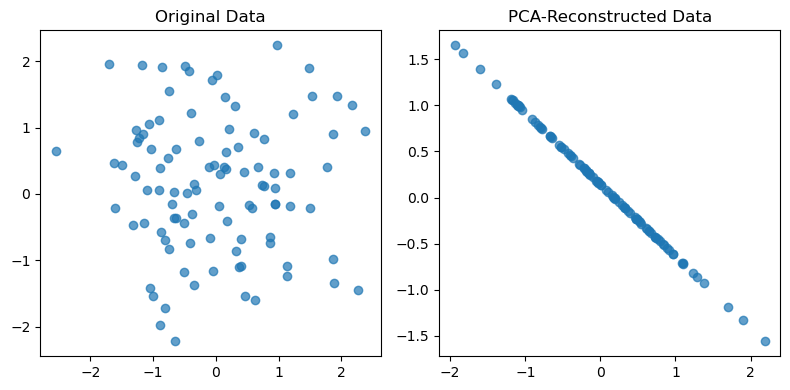

In [8]:
#initialize PCA with the desitred number of components 
n_components = 1
pca=PCA(n_components=n_components)


#fit PCA on the data and transform it 
x_pca = pca.fit_transform(x)

#inverse transform to get the projected data back into the original space
x_original = pca.inverse_transform(x_pca)

#plot the original data and the pca reconstructed data
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],alpha=0.7)
plt.title("Original Data")

plt.subplot(1,2,2)
plt.scatter(x_original[:,0],x_original[:,1],alpha=0.7)
plt.title("PCA-Reconstructed Data")

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


def perform_customer_segmentation(data):
    # Extract relevant features for clustering
    features = data[['Age', 'Gender', 'TotalPurchases', 'AveragePurchaseAmount']]
   
    # Standardize the features to have zero mean and unit variance
    scaler = StandardScaler()
    standardized_features = scaler.fit_transform(features)
   
    # Determine the number of clusters (you can change this as per your requirement)
    num_clusters = 5
   
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data['Segment'] = kmeans.fit_predict(standardized_features)
   
    return data

data = 2*np.random.rand(100,4)
df = pd.DataFrame(data)
df.columns = ['Age', 'Gender', 'TotalPurchases','AveragePurchaseAmount']

df.head()

perform_customer_segmentation(df)

/home/nimish-grover/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Age,Gender,TotalPurchases,AveragePurchaseAmount,Segment
0,1.789562,1.880638,0.480605,0.819026,0
1,0.469717,0.636020,0.331435,1.770040,2
2,1.639045,1.752166,1.945948,0.506595,3
3,0.177402,1.363457,1.169166,0.252674,3
4,1.390435,0.601711,1.905211,0.698760,3
...,...,...,...,...,...
95,0.605522,0.676851,1.973733,0.178135,3
96,0.117833,1.005573,1.308018,0.396676,3
97,1.182330,0.978751,1.429739,0.899959,3
98,0.537715,1.471141,1.446971,0.843617,3


/home/nimish-grover/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nimish-grover/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nimish-grover/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/nimish-grover/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer

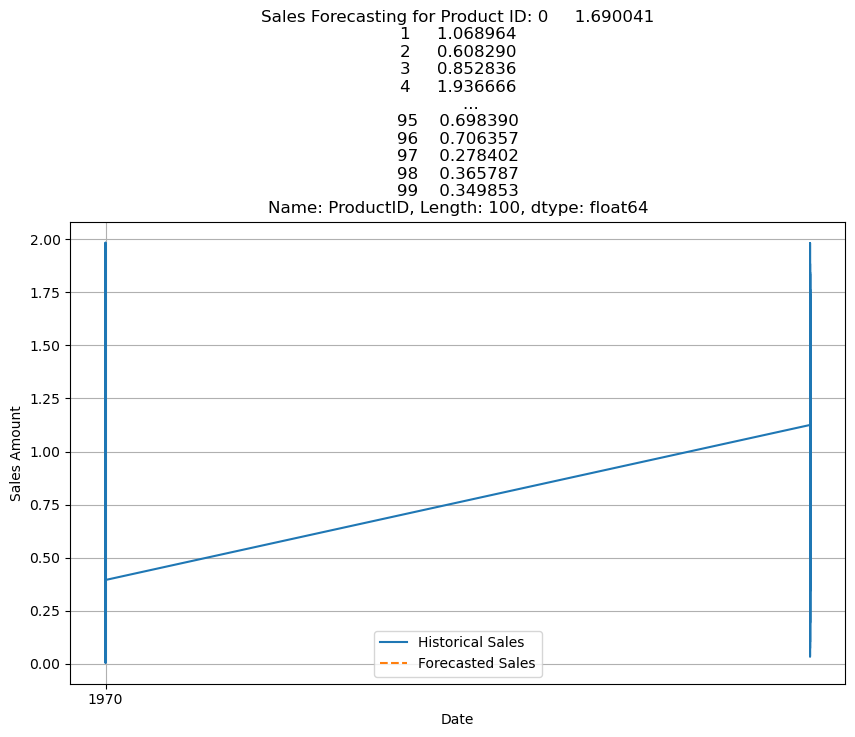

,ForecastedSales
1970-02-28 00:00:00.000000001,NaN
1970-03-31 00:00:00.000000001,NaN
1970-04-30 00:00:00.000000001,NaN
1970-05-31 00:00:00.000000001,NaN
1970-06-30 00:00:00.000000001,NaN
1970-07-31 00:00:00.000000001,NaN
1970-08-31 00:00:00.000000001,NaN
1970-09-30 00:00:00.000000001,NaN
1970-10-31 00:00:00.000000001,NaN
1970-11-30 00:00:00.000000001,NaN


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def sales_forecasting(data, product_id):
    # Filter data for the specific product_id
    product_data = data[data['ProductID'] == product_id].copy()
   
    # Convert the 'Date' column to a datetime type
    product_data['Date'] = pd.to_datetime(product_data['Date'])
   
    # Set the 'Date' column as the DataFrame index
    product_data.set_index('Date', inplace=True)
   
    # Sort the DataFrame by date
    product_data.sort_index(inplace=True)
   
    # Perform ARIMA forecasting
    order = (1, 1, 1)  # You can tune these parameters based on model evaluation
    model = ARIMA(product_data['SalesAmount'], order=order)
    results = model.fit()
   
    # Forecast future sales for the next 12 months
    forecast = results.forecast(steps=12)
   
    # Create a DataFrame with forecasted sales and corresponding dates
    forecast_dates = pd.date_range(start=product_data.index[-1], periods=13, freq='M')[1:]
    forecast_df = pd.DataFrame({'ForecastedSales': forecast}, index=forecast_dates)
   
    # Plot historical sales and forecasted sales
    plt.figure(figsize=(10, 6))
    plt.plot(product_data.index, product_data['SalesAmount'], label='Historical Sales')
    plt.plot(forecast_df.index, forecast_df['ForecastedSales'], label='Forecasted Sales', linestyle='dashed')
    plt.xlabel('Date')
    plt.ylabel('Sales Amount')
    plt.title(f'Sales Forecasting for Product ID: {product_id}')
    plt.legend()
    plt.grid(True)
    plt.show()
   
    return forecast_df

# Example usage
# Assuming you have a DataFrame called 'sales_data' containing columns 'Date', 'ProductID', and 'SalesAmount'.
# product_id_to_forecast = 12345  # Replace this with the desired product ID
# forecasted_sales = sales_forecasting(sales_data, product_id_to_forecast)
data = 2*np.random.rand(100,3)
df = pd.DataFrame(data)
df.columns = ['Date', 'ProductID','SalesAmount']
sales_forecasting(df,df['ProductID'])

In [2]:
import cv2